# SOM Training on IRIS Dataset


In [2]:
import torch
import matplotlib

from fastsom import *
from fastai.tabular import *
from sklearn.datasets import load_iris

### Creating the DataBunch

In [3]:
def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = iris.data
    y = iris.target
    labels = iris.feature_names
    target_names = iris.target_names
    return x, y, labels, target_names

In [4]:
x, y, labels, target_names = iris()

Let's create a `DataFrame` which we'll convert into a `TabularDataBunch`:

In [5]:
df = pd.DataFrame(np.concatenate([x, y.reshape(len(y), 1)], axis=-1), columns=labels+['target'])
df['target'] = df['target'].astype(int)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data = (SomTabularList.from_df(df, cat_names=[], cont_names=labels, procs=[Normalize])
       .split_by_rand_pct(0.1)
       .label_from_df(cols=['target'])
       .databunch())

Normalize 0 4
Normalize 0 4


### Creating the Learner

The `SomLearner` class can automatically infer the number of features from the `DataBunch`, and has a default map size of 10x10.

Since IRIS is a small dataset, we might want to use a smaller map:

In [7]:
learn = SomLearner(data, size=(8, 8), visualize=['weights'])

### Training the model

<IPython.core.display.Javascript object>


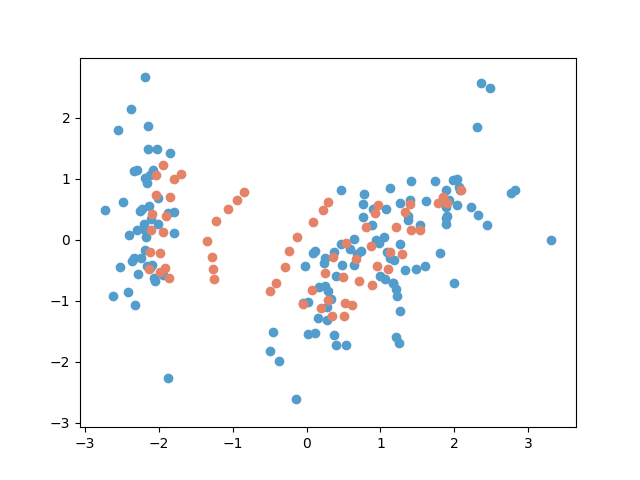

epoch,train_loss,valid_loss,time
0,0.917762,0.920132,00:01
1,0.927902,0.841256,00:00
2,0.947650,0.799575,00:00
3,0.940375,0.800808,00:00
4,0.928171,0.782886,00:00
5,0.916407,0.755832,00:00
6,0.901030,0.741214,00:00
7,0.890139,0.727876,00:00
8,0.880418,0.718866,00:00
9,0.869736,0.707099,00:00


In [8]:
%matplotlib notebook
learn.fit(50)

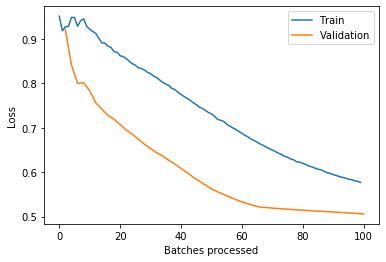

In [9]:
%matplotlib inline
learn.recorder.plot_losses()

### Interpretation

The `SomInterpretation` class provides visualization utilities, to better understand the output of the training process.

In [10]:
interp = SomInterpretation.from_learner(learn)

`show_hitmap` displays a heatmap of hit counts for each map position:

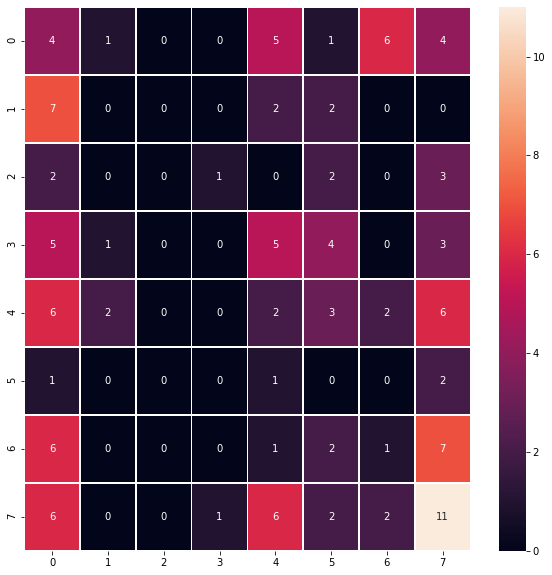

In [11]:
%matplotlib inline
interp.show_hitmap()

`show_preds` displays a topological distribution of classes over the map, if target information is available in the `DataBunch`: 

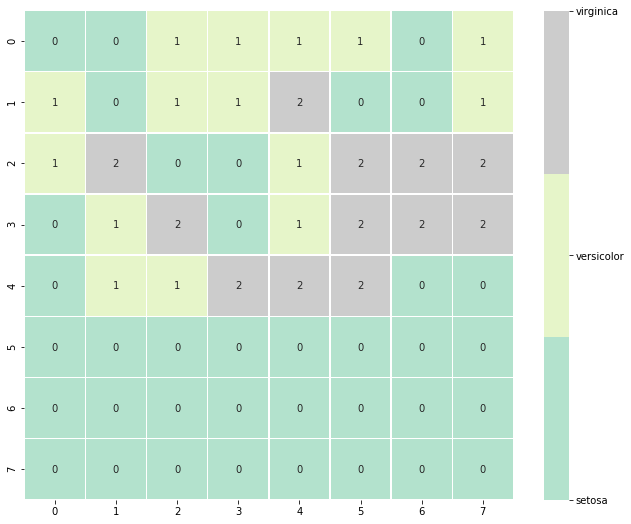

In [12]:
%matplotlib inline
interp.show_preds(class_names=target_names)

`show_feature_heatmaps` shows the per-feature value distribution over the SOM codebooks:

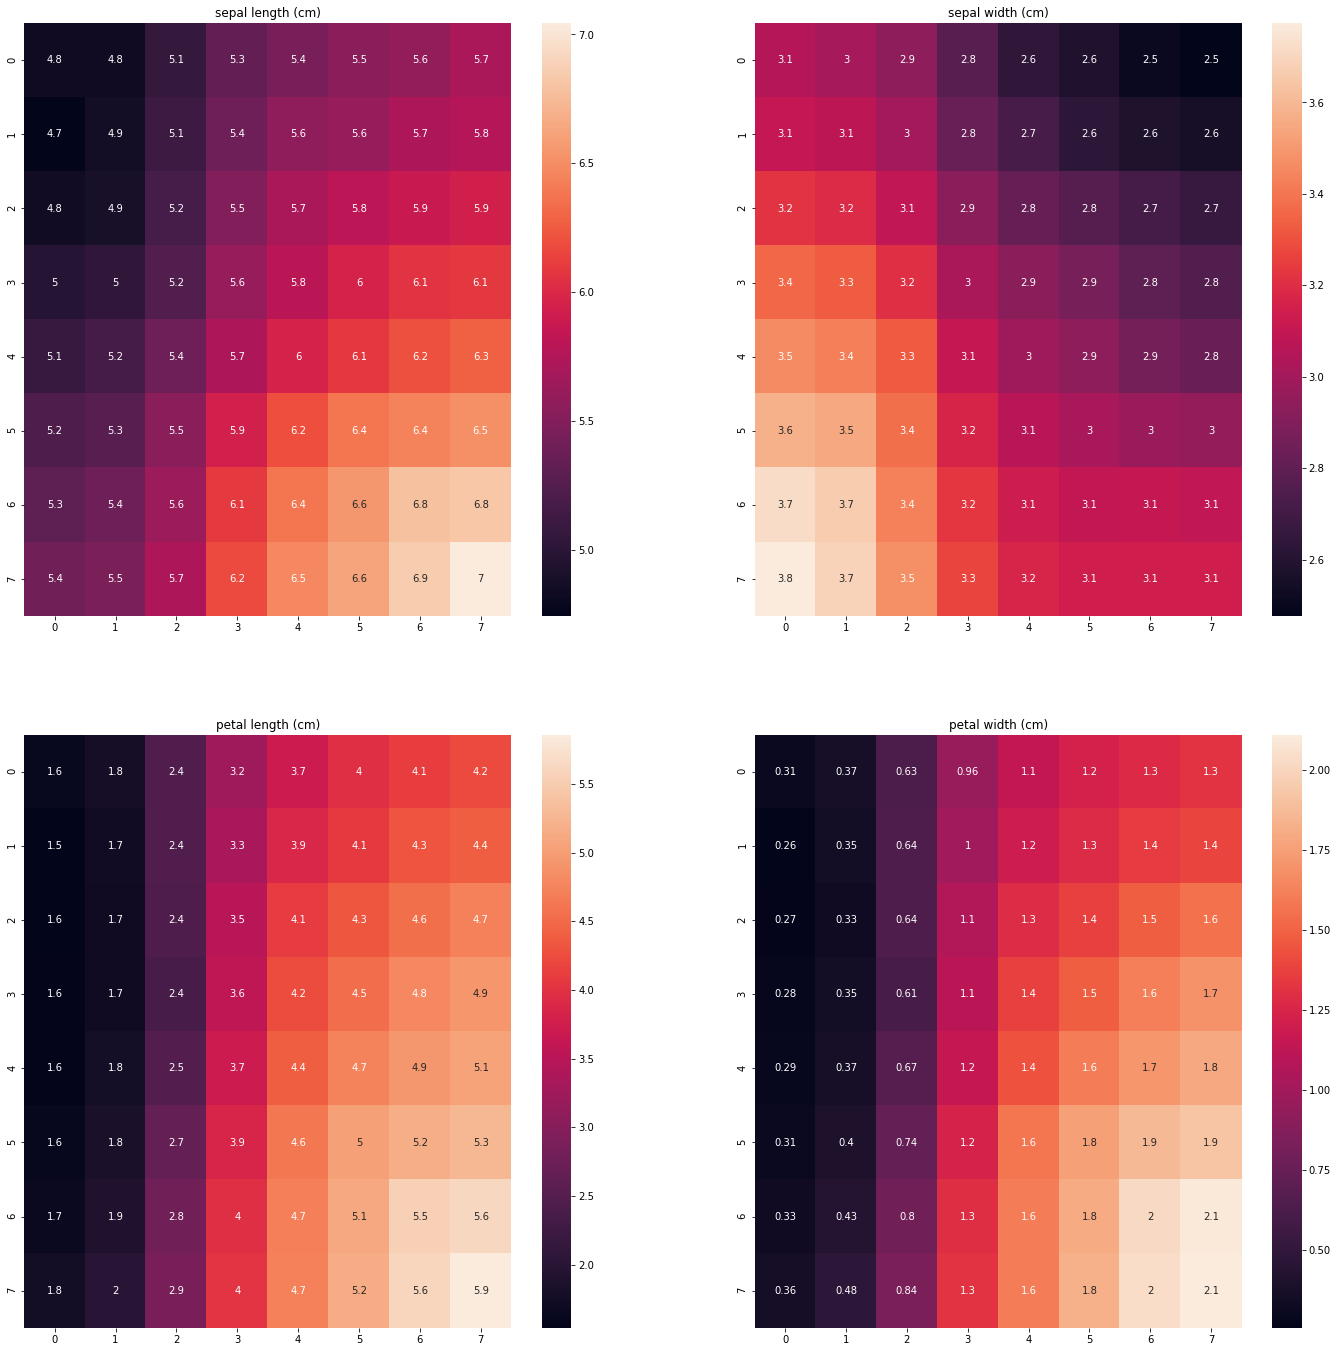

In [13]:
%matplotlib inline
interp.show_feature_heatmaps(cont_labels=labels, recategorize=False)

`show_weights` displays a three-dimensional PCA of the SOM codebook in an RGB image:

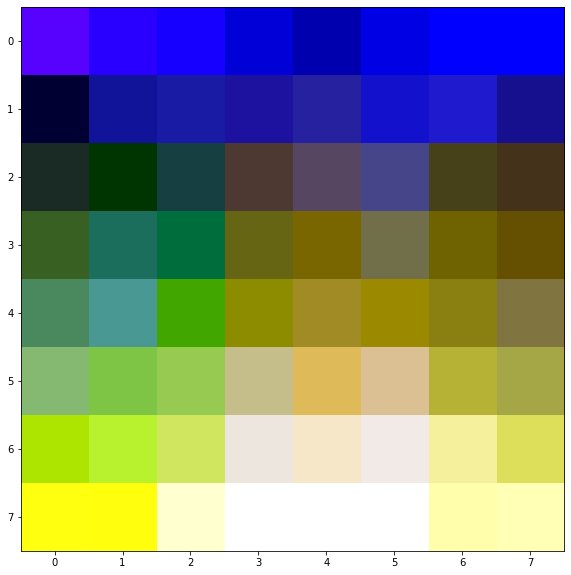

In [14]:
%matplotlib inline
interp.show_weights()